In [1]:
from ccDGGeom import np, Circle, Point

In [2]:
? Circle

Init signature:  Circle(x: int, y: int, r: int)
Docstring:      Numpy supporting circle class
Init docstring: Needs a coordinate and radius
File:           ~/Desktop/ccDunGen/ccDGGeom.py
Type:           type
Subclasses:     


In [3]:
c1 = Circle(10, 10, 5)
c2 = Circle(12, 20, 3)
c3 = Circle(4, 18, 4)
c1, c2, c3

(A radius    5 circle centered at (10, 10).,
 A radius    3 circle centered at (12, 20).,
 A radius    4 circle centered at (4, 18).)

In [4]:
np.stack((c1.getMinFrame().npar, c2.getMinFrame().npar, c3.getMinFrame().npar))

array([[16, 16],
       [24, 16],
       [23,  9]])

In [5]:
np.max(_, axis = 0)

array([24, 16])

In [6]:
c1.getMaskEdge(16, 24) | c2.getMaskEdge(16, 24) | c3.getMaskEdge(16, 24)

array([[_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _],
       [_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _],
       [_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _],
       [_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _],
       [_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _],
       [_, _, _, _, _, _, _, _, _, #, #, #, _, _, _, _],
       [_, _, _, _, _, _, _, #, #, _, _, _, #, #, _, _],
       [_, _, _, _, _, _, #, _, _, _, _, _, _, _, #, _],
       [_, _, _, _, _, _, #, _, _, _, _, _, _, _, #, _],
       [_, _, _, _, _, #, _, _, _, _, _, _, _, _, _, #],
       [_, _, _, _, _, #, _, _, _, _, _, _, _, _, _, #],
       [_, _, _, _, _, #, _, _, _, _, _, _, _, _, _, #],
       [_, _, _, _, _, _, #, _, _, _, _, _, _, _, #, _],
       [_, _, _, _, _, _, #, _, _, _, _, _, _, _, #, _],
       [_, _, _, #, #, #, _, #, #, _, _, _, #, #, _, _],
       [_, #, #, _, _, _, #, #, _, #, #, #, _, _, _, _],
       [_, #, _, _, _, _, _, #, _, _, _, _, _, _, _, _],
       [#, _, _, _, _, _, _, _,

In [7]:
c2.getAzimuth(c1)

168.69006752597977

In [8]:
c1.getCentroid() - c2.getCentroid()

(-2, -10)

In [9]:
c2.getAzimuth(c3)

104.03624346792648

In [10]:
c3.getAzimuth(c2)

284.0362434679265

In [11]:
c3.getAzimuth(c1)

216.86989764584402

In [12]:
c1.getAzimuth(c3)

36.86989764584402

In [13]:
c3.getAngledEdgeCell(c3.getAzimuth(c2) - 10.)

(8, 19)

In [14]:
type(_)

ccDGGeom.Point

In [15]:
help(Circle.getAzimuth)

Help on function getAzimuth in module ccDGGeom:

getAzimuth(self, other) -> float
    Determine the bearing towards another shape (its centroid in particular)
    
    To go from trig angles (
            start at 3 o'clock, counterclockwise
    ) to azimuths (
            start at 6 o'clock (
                    not noon since y increseas downward in graphics
            ), clockwise (
                    but this is cancelled out by Graphics Space being right-handed,
                    compared to Cartesian Space, which is left-handed;
                    In right-handed trig, angles increase clockwise (think about it!)
            )
    ), we need to rotate 90 degrees to the right to bring the trig 0-axis
    to meet the place for the azimuth 0-axis.
    
    Mathematcially, this is $       heta - 90$.
    Since we don't want negative azimuths, we mod by 360 to wind negatives around.



In [16]:
? Circle.getAzimuth

Signature:  Circle.getAzimuth(self, other) -> float
Docstring:
Determine the bearing towards another shape (its centroid in particular)

To go from trig angles (
        start at 3 o'clock, counterclockwise
) to azimuths (
        start at 6 o'clock (
                not noon since y increseas downward in graphics
        ), clockwise (
                but this is cancelled out by Graphics Space being right-handed,
                compared to Cartesian Space, which is left-handed;
                In right-handed trig, angles increase clockwise (think about it!)
        )
), we need to rotate 90 degrees to the right to bring the trig 0-axis
to meet the place for the azimuth 0-axis.

Mathematcially, this is $       heta - 90$.
Since we don't want negative azimuths, we mod by 360 to wind negatives around.
File:      ~/Desktop/ccDunGen/ccDGGeom.py
Type:      function


In [17]:
c2.radius

3

In [18]:
theta = c2.getAzimuth(c1) + 90
c2.radius * np.array((np.cos(theta * np.pi / 180.), np.sin(theta * np.pi / 180.)))

array([-0.588, -2.942])

In [19]:
_.round().astype(int)

array([-1, -3])

In [20]:
_ + c2.origin.npar[::-1]

array([11, 17])

In [21]:
c2.getMaskEdge()[17, 11]

True

In [22]:
np.vstack([p.npar for p in c2.edgeCells])

array([[23, 11],
       [19, 15],
       [20, 15],
       [17, 13],
       [18, 10],
       [22, 14],
       [18, 14],
       [20,  9],
       [19,  9],
       [21, 15],
       [21,  9],
       [23, 13],
       [23, 12],
       [17, 11],
       [22, 10],
       [17, 12]])

In [23]:
np.count_nonzero(np.all(_ == np.array([17, 11]), axis = 1)) > 0

True

In [24]:
np.linspace(0., 360., 46)

array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,  88.,  96., 104., 112., 120., 128., 136., 144., 152.,
       160., 168., 176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256., 264., 272., 280., 288., 296., 304., 312.,
       320., 328., 336., 344., 352., 360.])

In [25]:
edgeArray = np.vstack([p.npar for p in c2.edgeCells])
for theta in np.linspace(0., 360., 91):
    p = c2.origin + Point(
        *(
            (
                c2.radius * np.array([np.sin(theta * np.pi / 180.), np.cos(theta * np.pi / 180.)])
            ).round().astype(int)
        ).tolist()[::-1]
    )
    onEdge = np.count_nonzero(np.all(p.npar == edgeArray, axis = 1)) > 0
    print(theta, p, onEdge)
    if not onEdge:
        infoArray = np.hstack((
            edgeArray - p.npar,
            np.sum(
                np.abs(
                    edgeArray - p.npar
                ), axis = 1
            ).reshape(-1, 1),
            edgeArray
        ))
        print(infoArray, np.argmin(infoArray[:, 2]), edgeArray[np.argmin(infoArray[:, 2]), :])

0.0 (15, 20) True
4.0 (15, 20) True
8.0 (15, 20) True
12.0 (15, 21) True
16.0 (15, 21) True
20.0 (15, 21) True
24.0 (15, 21) True
28.0 (15, 21) True
32.0 (15, 22) False
[[ 1 -4  5 23 11]
 [-3  0  3 19 15]
 [-2  0  2 20 15]
 [-5 -2  7 17 13]
 [-4 -5  9 18 10]
 [ 0 -1  1 22 14]
 [-4 -1  5 18 14]
 [-2 -6  8 20  9]
 [-3 -6  9 19  9]
 [-1  0  1 21 15]
 [-1 -6  7 21  9]
 [ 1 -2  3 23 13]
 [ 1 -3  4 23 12]
 [-5 -4  9 17 11]
 [ 0 -5  5 22 10]
 [-5 -3  8 17 12]] 5 [22 14]
36.0 (14, 22) True
40.0 (14, 22) True
44.0 (14, 22) True
48.0 (14, 22) True
52.0 (14, 22) True
56.0 (14, 22) True
60.0 (14, 23) False
[[ 0 -3  3 23 11]
 [-4  1  5 19 15]
 [-3  1  4 20 15]
 [-6 -1  7 17 13]
 [-5 -4  9 18 10]
 [-1  0  1 22 14]
 [-5  0  5 18 14]
 [-3 -5  8 20  9]
 [-4 -5  9 19  9]
 [-2  1  3 21 15]
 [-2 -5  7 21  9]
 [ 0 -1  1 23 13]
 [ 0 -2  2 23 12]
 [-6 -3  9 17 11]
 [-1 -4  5 22 10]
 [-6 -2  8 17 12]] 5 [22 14]
64.0 (13, 23) True
68.0 (13, 23) True
72.0 (13, 23) True
76.0 (13, 23) True
80.0 (13, 23) True
84.0

In [26]:
from ccDGLevels import Catacombs
from matplotlib import pyplot as plot

plot.rcParams["figure.figsize"] = (12, 9)

help(Catacombs)

Help on class Catacombs in module ccDGLevels:

class Catacombs(builtins.object)
 |  Catacombs(w: int, h: int, rct: int, raap: float, varix: int, variy: int, conn: int, doShift: bool, padx: int = 0, pady: int = 0, thick: int = 1, varih: int = 0)
 |  
 |  Nethack style dungeon
 |  
 |  Methods defined here:
 |  
 |  __init__(self, w: int, h: int, rct: int, raap: float, varix: int, variy: int, conn: int, doShift: bool, padx: int = 0, pady: int = 0, thick: int = 1, varih: int = 0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> str
 |      Generic representation
 |  
 |  __str__(self) -> str
 |      String representation
 |  
 |  draw(self, mode: str = '') -> <built-in function array>
 |      Produce a 2D boolean numpy array mask of the dungeon.
 |      Modes are as follows:
 |      
 |      (Note: mode strings can be mix of capitalization:
 |              ex. "doors" or "Doors" or "DOORS"
 |      )
 |      
 |      * default (""): draw the

In [27]:
d = Catacombs(320, 200, 28, 0.015, 20, 10, 3, True, 9, 9, 4, 2)
d

A 320 wide by 200 tall dungeon,
with 28 rooms of about 02% average area each,
or of average dimension 39 wide by 24 tall,
with an average of 3 hallways out of each room;
Rooms are padded by at least 9 East-West & 9 North-South,
and have a length variance of +/-20 wide and +/- 10 tall.

[-6  7] (33, 31) (118, 3)
A   33 by   31 Rectangle cornered at ( 118,    3).
A   51 by   49 Rectangle cornered at ( 109,    0).

[18  2] (57, 26) (187, 78)
A   57 by   26 Rectangle cornered at ( 187,   78).
A   75 by   44 Rectangle cornered at ( 178,   69).

[19 10] (58, 34) (116, 120)
A   58 by   34 Rectangle cornered at ( 116,  120).
A   76 by   52 Rectangle cornered at ( 107,  111).

[2 7] (41, 31) (261, 17)
A   41 by   31 Rectangle cornered at ( 261,   17).
A   59 by   49 Rectangle cornered at ( 252,    8).

[ 6 -5] (45, 19) (42, 5)
A   45 by   19 Rectangle cornered at (  42,    5).
A   63 by   37 Rectangle cornered at (  33,    0).

[17  1] (56, 25) (94, 44)
A   56 by   25 Rectangle cornered at (  94,   44).
A   74 by   43 Rectangle cornered at (  85,   35).

[4 2] (43, 26) (4, 73)
A   43 by   26 Rectangle cornered at (   4,   73).
A   61 by   44 Rectangle cornered at (   0,   64).

[-10 -10] (29, 14) (52, 162)
A   29 by   14 Rectangle cornered at (  52,  162).
A   47 by   32 Rect

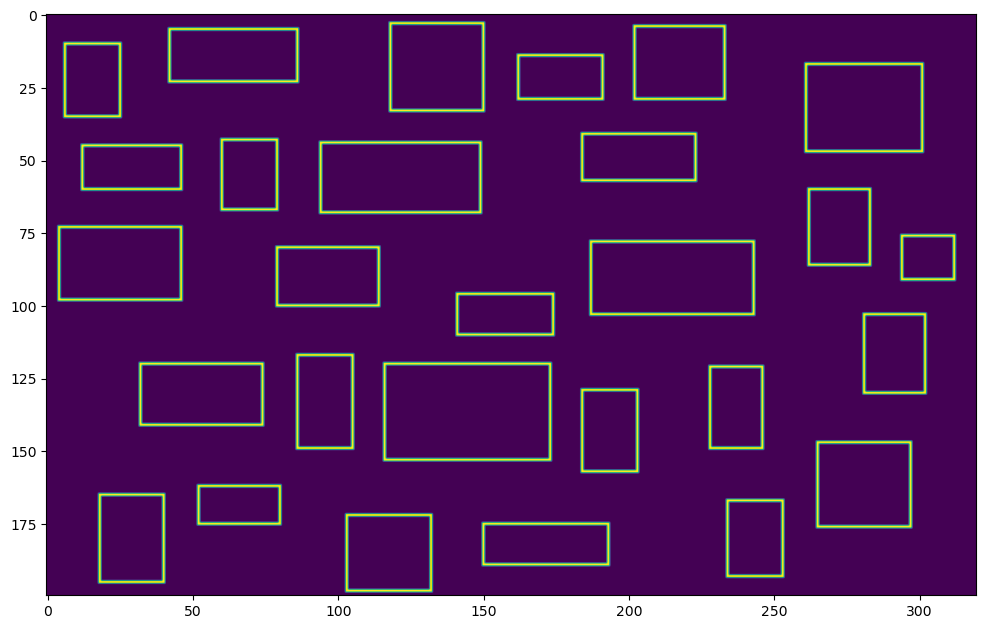

In [28]:
d.genRooms(reset = True)
plot.imshow(d.draw())
plot.show()

In [29]:
d.genHalls(reset = True)

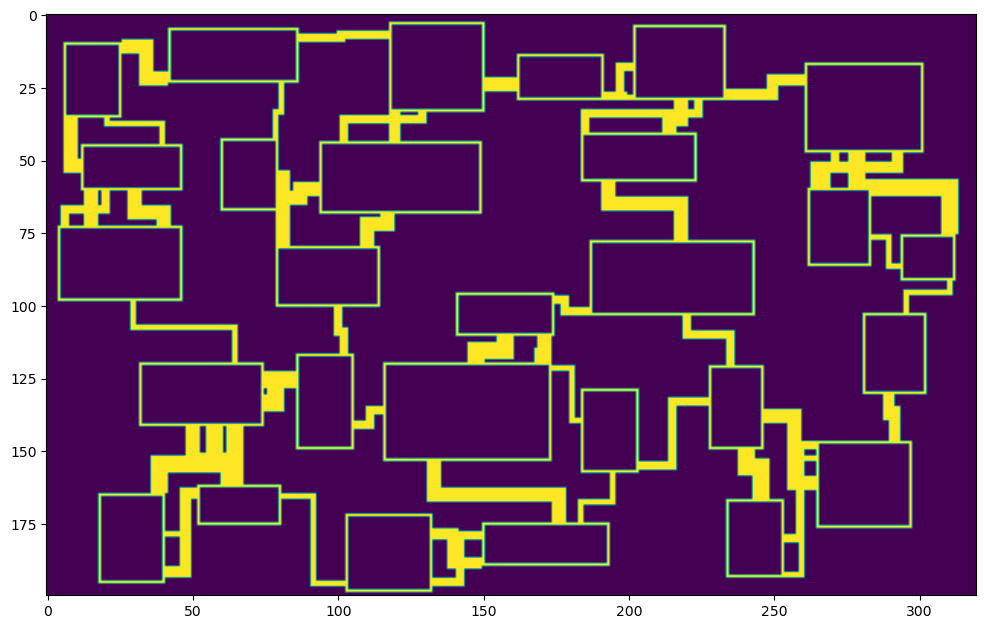

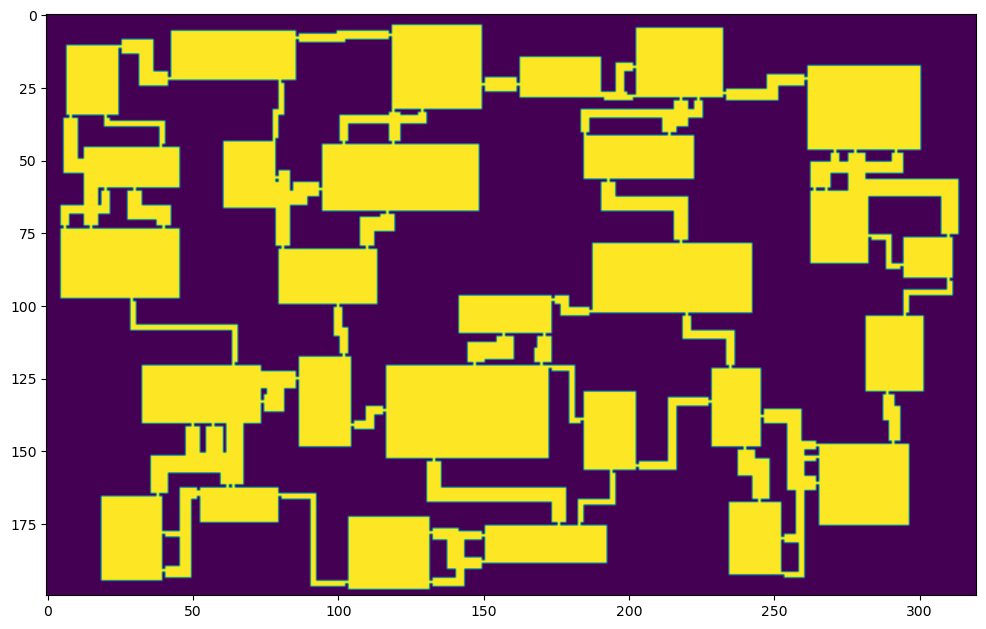

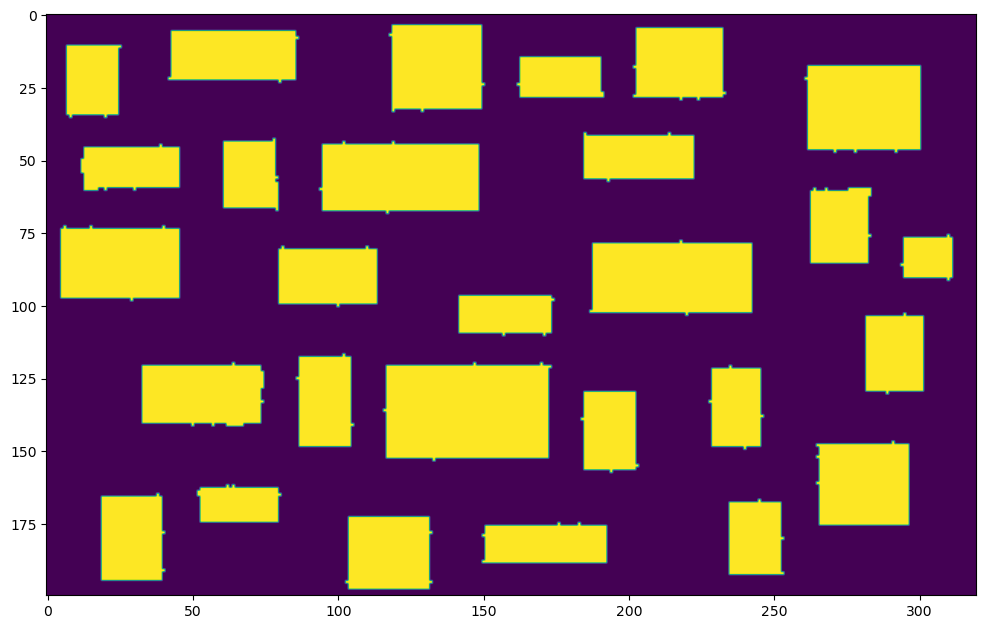

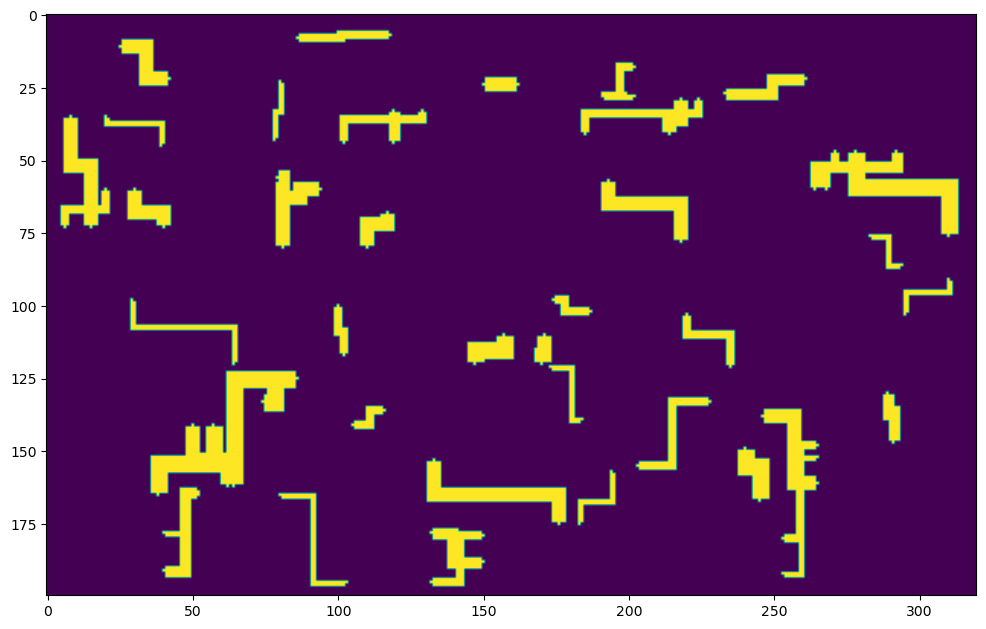

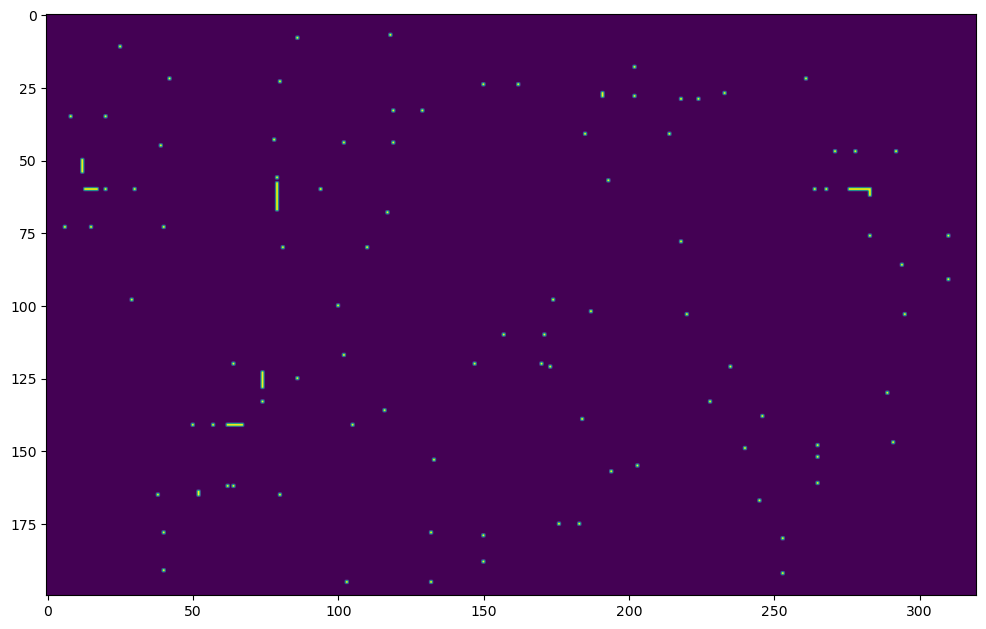

In [30]:
plot.imshow(d.draw())
plot.show()
plot.imshow(d.draw("nowalls"))
plot.show()
plot.imshow(d.draw("doors"))
plot.show()
plot.imshow(d.draw("hallonly"))
plot.show()
plot.imshow(d.draw("dooronly"))
plot.show()

In [31]:
? Catacombs.draw

Signature:  Catacombs.draw(self, mode: str = '') -> <built-in function array>
Docstring:
Produce a 2D boolean numpy array mask of the dungeon.
Modes are as follows:

(Note: mode strings can be mix of capitalization:
        ex. "doors" or "Doors" or "DOORS"
)

* default (""): draw the walls of rooms and hallways
* "hallonly"  : draw only the hallways
* "nowalls"   : draw the floors of rooms and hallways
* "doors"     : draw the floors of rooms and their doorways
* "dooronly"  : draw only the doorways
File:      ~/Desktop/ccDunGen/ccDGLevels.py
Type:      function


In [32]:
import ccDGLevels as levels

In [33]:
? levels.Rectangle

Init signature:  levels.Rectangle(x: int, y: int, w: int, h: int)
Docstring:      Numpy supporting rectangle class
Init docstring:
Needs a coordinate for the northwest corner (nearest to origin),
a width, and height
File:           ~/Desktop/ccDunGen/ccDGGeom.py
Type:           type
Subclasses:     


In [34]:
help(levels.Rectangle)

Help on class Rectangle in module ccDGGeom:

class Rectangle(Shape)
 |  Rectangle(x: int, y: int, w: int, h: int)
 |  
 |  Numpy supporting rectangle class
 |  
 |  Method resolution order:
 |      Rectangle
 |      Shape
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x: int, y: int, w: int, h: int)
 |      Needs a coordinate for the northwest corner (nearest to origin),
 |      a width, and height
 |  
 |  __repr__(self) -> str
 |      Generic representation (just uses __str__)
 |  
 |  __str__(self) -> str
 |      String representation
 |  
 |  getCentroid(self) -> ccDGGeom.Point
 |      Determine the center cell of the rectangle
 |  
 |  getMaskEdge(self, fw: int = 0, fh: int = 0) -> <built-in function array>
 |      Get a binary numpy mask array with the rectangle's edge only,
 |      to arbitrary frame size
 |  
 |  getMaskFill(self, fw: int = 0, fh: int = 0) -> <built-in function array>
 |      Get a binary numpy mask array with the rectangle fille

In [35]:
help(levels.Circle)

Help on class Circle in module ccDGGeom:

class Circle(Shape)
 |  Circle(x: int, y: int, r: int)
 |  
 |  Numpy supporting circle class
 |  
 |  Method resolution order:
 |      Circle
 |      Shape
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x: int, y: int, r: int)
 |      Needs a coordinate and radius
 |  
 |  __repr__(self)
 |      Generic representation (just uses __str__)
 |  
 |  __str__(self)
 |      String representation
 |  
 |  getAngledEdgeCell(self, azimuth: float) -> ccDGGeom.Point
 |      Determine the best edge cell of this circle given a bearing
 |  
 |  getCentroid(self) -> ccDGGeom.Point
 |      Return the center cell of the cirlce
 |  
 |  getMaskEdge(self, fw: int = 0, fh: int = 0) -> <built-in function array>
 |      Get a binary numpy mask array with the circle's edge only,
 |      to arbitrary frame size
 |  
 |  getMaskFill(self, fw: int = 0, fh: int = 0) -> <built-in function array>
 |      Use flood fill to get a binary numpy

In [36]:
from ccDGGeom import Shape
help(Shape)

Help on class Shape in module ccDGGeom:

class Shape(builtins.object)
 |  Base shape class
 |  
 |  Methods defined here:
 |  
 |  __and__(self, other) -> bool
 |      Turn the overlap method into an operator (not commutative!)
 |      (IT IS, YOU IDIOT!!)
 |  
 |  getAzimuth(self, other) -> float
 |      Determine the bearing towards another shape (its centroid in particular)
 |      
 |      To go from trig angles (
 |              start at 3 o'clock, counterclockwise
 |      ) to azimuths (
 |              start at 6 o'clock (
 |                      not noon since y increseas downward in graphics
 |              ), clockwise (
 |                      but this is cancelled out by Graphics Space being right-handed,
 |                      compared to Cartesian Space, which is left-handed;
 |                      In right-handed trig, angles increase clockwise (think about it!)
 |              )
 |      ), we need to rotate 90 degrees to the right to bring the trig 0-axis
 |      to m

In [38]:
(
    levels.Line(0, 0, 2, 'n'),
    levels.Line(0, 0, 3, 'e'),
    levels.Line(0, 0, 4, 's'),
    levels.Line(0, 0, 5, 'w'),
)

(A    2 cell long line starting from (0, 0) headed north.,
 A    3 cell long line starting from (0, 0) headed east.,
 A    4 cell long line starting from (0, 0) headed south.,
 A    5 cell long line starting from (0, 0) headed west.)